In [1]:
import getpass, time
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import available_backends, execute, register, least_busy
from qiskit.tools.visualization import plot_histogram, circuit_drawer

In [2]:
import sys
sys.path.append('D:/Programming/GitHub/qiskit-tutorial/')
import Qconfig
register(Qconfig.APItoken, Qconfig.config['url'])

QISKitError: "Couldn't instantiate provider! Error: Couldn't connect to IBMQuantumExperience server: error during login: HTTPSConnectionPool(host='quantumexperience.ng.bluemix.net', port=443): Max retries exceeded with url: /api/users/loginWithToken (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000002526FAAD8D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))"

In [ ]:
print(available_backends({'local': False, 'simulator': False}))

In [ ]:
backend = least_busy(available_backends({'simulator': False, 'local': False}))
print("The least busy backend is " + backend)

In [ ]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
XOR = QuantumCircuit(q,c)
XOR.h(q[0])
XOR.x(q[1])
XOR.barrier(q)
XOR.cx(q[0],q[1])
#XOR.x(q)
XOR.measure(q,c)

In [ ]:
q0 = QuantumRegister(2)
c0 = ClassicalRegister(2)
XNOR = QuantumCircuit(q0,c0)
XNOR.h(q0[0])
XNOR.cx(q0[0],q0[1])
XNOR.measure(q0,c0)

In [ ]:
print(XOR.qasm())
print(XNOR.qasm())

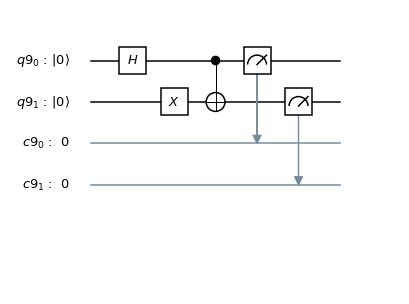

In [52]:
circuit_drawer(XOR)

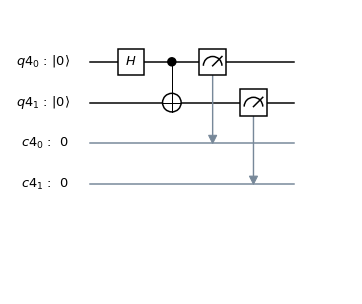

In [29]:
circuit_drawer(XNOR)

In [53]:
from qiskit import QuantumProgram
qp1 = QuantumProgram()
qp1.add_circuit('XOR',XOR)
qp1.add_circuit('XNOR',XNOR)

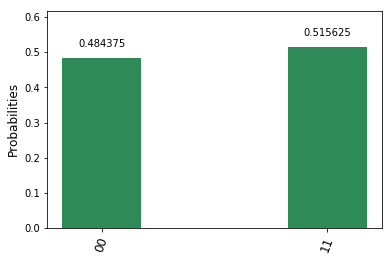

In [38]:
result_1 = qp1.execute(['XNOR'], backend='local_qasm_simulator',timeout=300)
counts = result_1.get_counts('XNOR')
plot_histogram(counts)

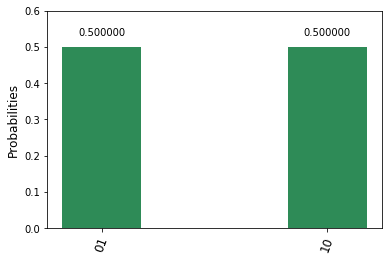

In [54]:
result = qp1.execute(['XOR'], backend='local_qasm_simulator',timeout=300)
count = result.get_counts('XOR')
plot_histogram(count)

In [14]:
result = qp1.execute(['XOR'], backend='ibmq_5_tenerife',timeout=3000)
counts = result.get_counts('XOR')
plot_histogram(counts)

QISKitError: 'QISKit timed out'